In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import plotnine
import collections as col
import seaborn as sns


data=pd.read_excel('/media/sda6/Projects/Data Mining on gas Network/NEWELECTRICITY.xlsx')
data.head()

,Column_1,row,week day,unique row,Unnamed: 3,date,report time,CT,UDC,UDCC,...,CN,CPN,TNOS,reporter,TOO,WR,year,month,day,Recoded report time
0,0,1,سه شنبه,1087467426,NaN,1395-01-31 00:00:00,22:33:00,22:50:00,NaN,0,...,NaN,NaN,0,مشترک,---,---,1395,1,31,22
1,1,2,سه شنبه,1087467260,NaN,1395-01-31 00:00:00,19:22:00,19:30:00,NaN,0,...,NaN,NaN,0,مشترک,---,---,1395,1,31,19
2,2,3,سه شنبه,1157467260,NaN,1395-01-31 00:00:00,19:21:00,19:33:00,NaN,0,...,NaN,NaN,0,مشترک,---,---,1395,1,31,19
3,3,4,سه شنبه,1157467172,NaN,1395-01-31 00:00:00,18:25:00,18:35:00,NaN,0,...,NaN,NaN,0,مشترک,---,---,1395,1,31,18
4,4,5,سه شنبه,1087467163,NaN,1395-01-31 00:00:00,18:20:00,19:00:00,NaN,0,...,NaN,NaN,0,مشترک,---,---,1395,1,31,18


In [2]:
data.shape

(18265, 46)

In [3]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18265 entries, 0 to 18264
Data columns (total 46 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Column_1             18265 non-null  int64  
 1   row                  18265 non-null  int64  
 2   week day             18265 non-null  object 
 3   unique row           18265 non-null  int64  
 4   Unnamed: 3           0 non-null      float64
 5   date                 17966 non-null  object 
 6   report time          18265 non-null  object 
 7   CT                   18265 non-null  object 
 8   UDC                  9397 non-null   object 
 9   UDCC                 18265 non-null  int64  
 10  MPF                  9342 non-null   object 
 11  MPFC                 18265 non-null  int64  
 12  DC                   7552 non-null   object 
 13  DCC                  245 non-null    float64
 14  WPF                  18193 non-null  float64
 15  voltage              18265 non-null 

<AxesSubplot:>

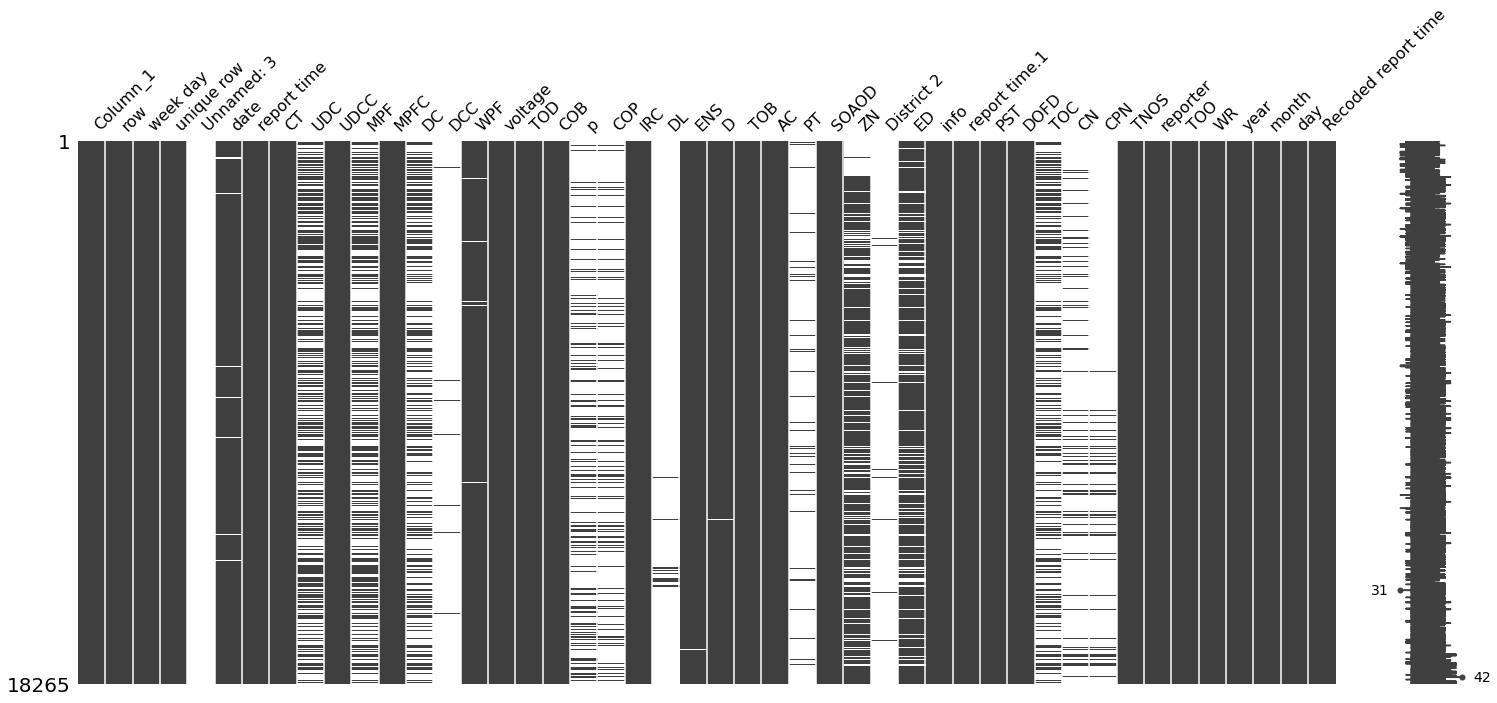

In [5]:
msno.matrix(data)

# Statistical Overview

In [6]:
data[['WPF','IRC','DL' ,'ENS','DOFD']].describe()

,WPF,IRC,DL,ENS,DOFD
count,18193.000000,18262.000000,372.000000,18255.000000,18265.000000
mean,0.923817,59.827730,5.794371,242.500736,49.412866
std,1.832510,95.282456,6.962703,1586.119791,42.948858
min,0.000000,0.000000,0.147224,0.000000,0.000000
25%,0.000000,8.000000,2.944486,0.211140,19.000000
50%,0.000000,15.000000,3.533384,3.037310,33.000000
75%,1.000000,87.000000,4.976182,42.969273,67.000000
max,13.000000,1392.000000,41.000000,121483.335938,398.000000


KeyboardInterrupt: 

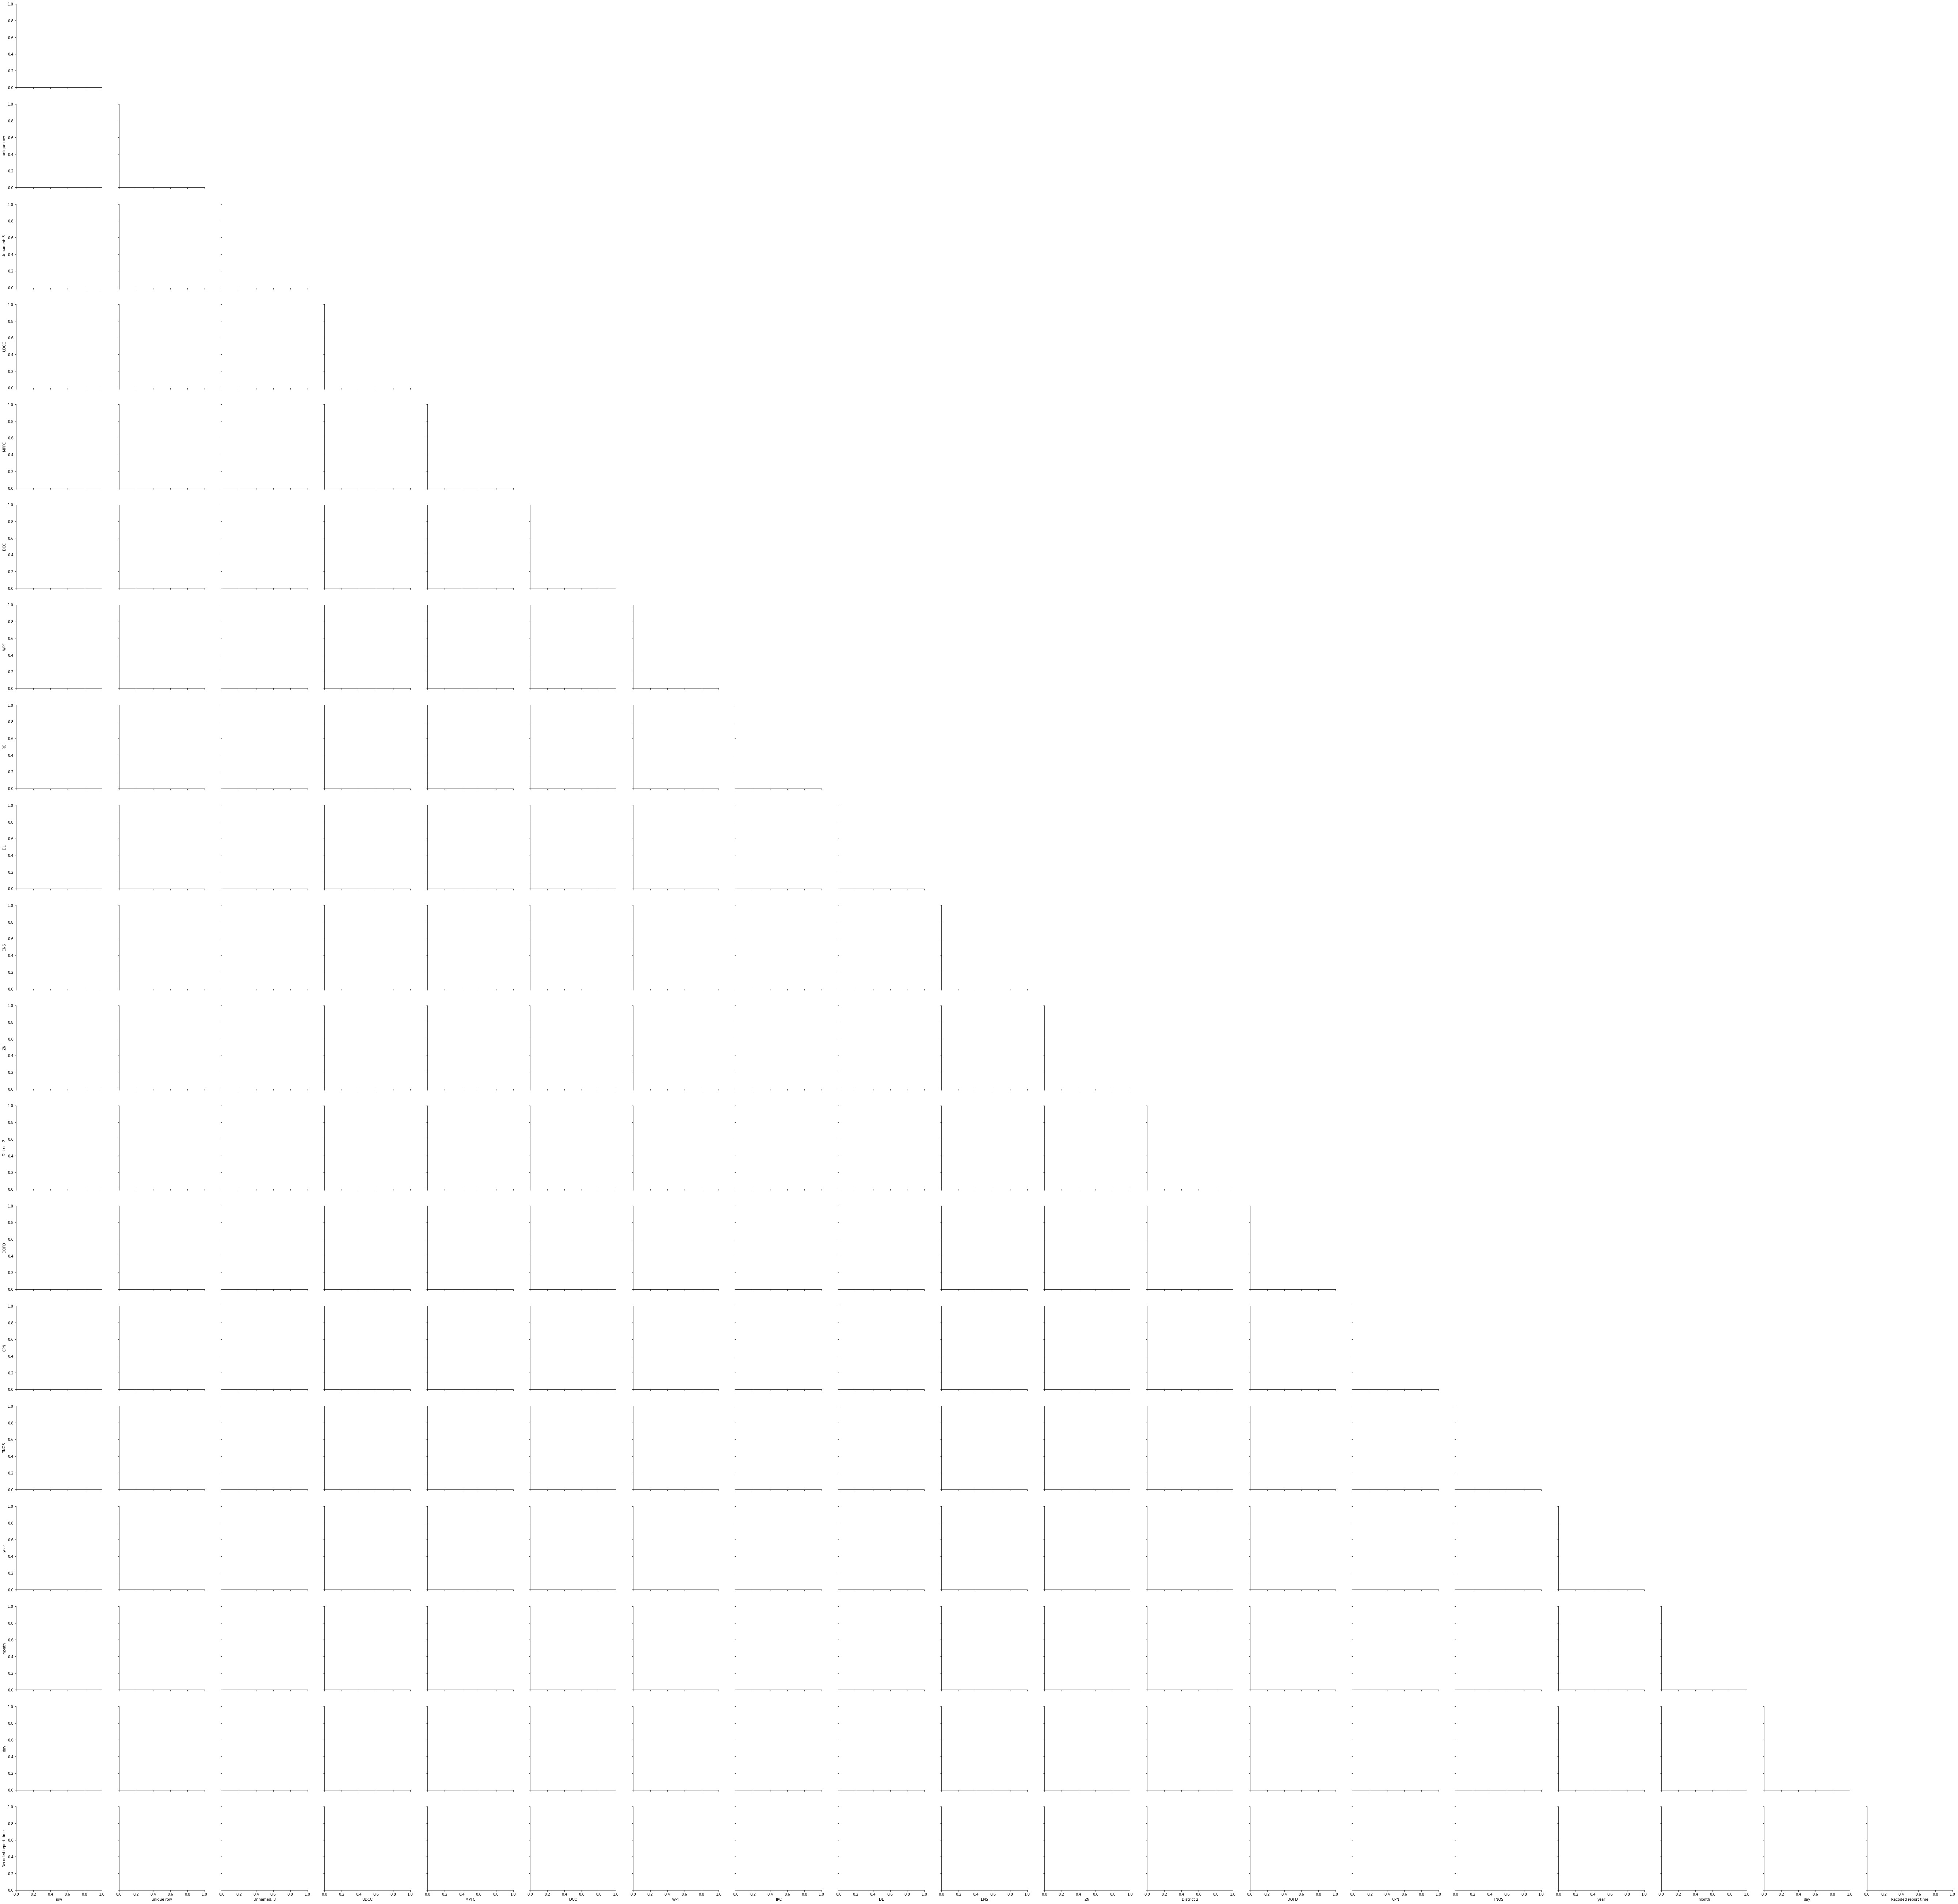

In [8]:
sns.pairplot(data.drop('Column_1',1),corner=True,height=5)

In [ ]:
def plotCorrelationMatrix(data, graphWidth):
    #filename = df.dataframeName
    #data = data.dropna('columns') # drop columns with NaN
    data = data[[col for col in data if data[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if data.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({data.shape[1]}) is less than 2')
        return
    corr = data.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix', fontsize=15)
    plt.show()

In [ ]:
plotCorrelationMatrix(data, 8)

__bar chart for (week day,year,month,day) for 3years__

<AxesSubplot:xlabel='week day', ylabel='count'>

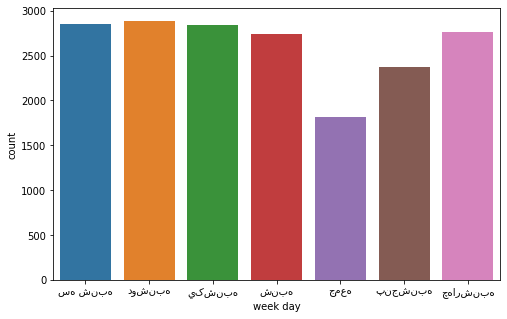

In [10]:
dim=(8,5)
fig,ax = plt.subplots(figsize=dim)
sns.countplot(x='week day', ax=ax, data=data)

<AxesSubplot:xlabel='year', ylabel='count'>

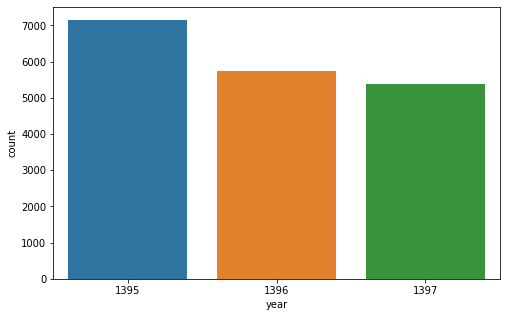

In [11]:
dim=(8,5)
fig,ax = plt.subplots(figsize=dim)
sns.countplot(x='year', ax=ax, data=data)

<AxesSubplot:xlabel='month', ylabel='count'>

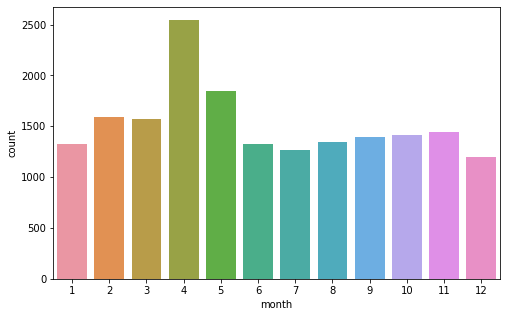

In [12]:
dim=(8,5)
fig,ax = plt.subplots(figsize=dim)
sns.countplot(x='month', ax=ax, data=data)

<AxesSubplot:xlabel='day', ylabel='count'>

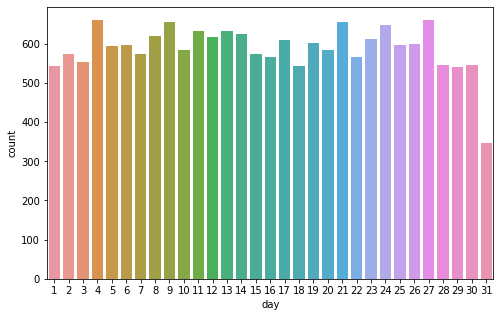

In [13]:
dim=(8,5)
fig,ax = plt.subplots(figsize=dim)
sns.countplot(x='day', ax=ax, data=data)

<AxesSubplot:xlabel='Recoded report time', ylabel='count'>

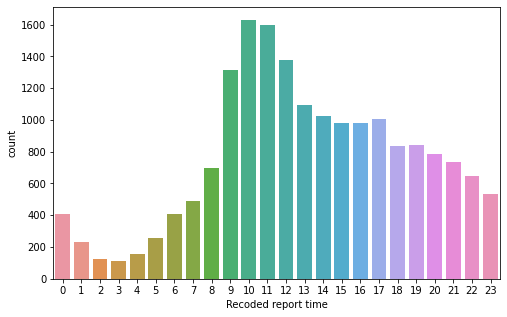

In [14]:
dim=(8,5)
fig,ax = plt.subplots(figsize=dim)
sns.countplot(x='Recoded report time', ax=ax, data=data)

In [4]:
dataset=data[['day','Recoded report time','year','month','ENS','COB','TOD','DOFD']]
dataset.head()

,day,Recoded report time,year,month,ENS,COB,TOD,DOFD
0,31,22,1395,1,0.118766,اشكال در كابل سرويس,انشعابات مشتركان,27
1,31,19,1395,1,0.114368,اشكال در كابل سرويس,انشعابات مشتركان,13
2,31,19,1395,1,0.000000,اشكال در شبكه داخليD,انشعابات مشتركان,14
3,31,18,1395,1,0.043988,اشكال در لوازم اندازه گيري مشتركين غيرديماندي ...,انشعابات مشتركان,12
4,31,18,1395,1,0.527850,اشكال در كابل سرويس,انشعابات مشتركان,60


In [5]:
dataset["COB"] = dataset["COB"].astype('category')
dataset.dtypes
dataset["TOD"] = dataset["TOD"].astype('category')
dataset.dtypes

<ipython-input-5-cbd1b52b2b64>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-5-cbd1b52b2b64>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


day                       int64
Recoded report time       int64
year                      int64
month                     int64
ENS                     float64
COB                    category
TOD                    category
DOFD                      int64
dtype: object

In [6]:
dataset["COB"] = dataset["COB"].cat.codes

dataset["TOD"] = dataset["TOD"].cat.codes
dataset.head()

<ipython-input-6-8ad4ca4f1f5c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-6-8ad4ca4f1f5c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,day,Recoded report time,year,month,ENS,COB,TOD,DOFD
0,31,22,1395,1,0.118766,31,1,27
1,31,19,1395,1,0.114368,31,1,13
2,31,19,1395,1,0.000000,29,1,14
3,31,18,1395,1,0.043988,34,1,12
4,31,18,1395,1,0.527850,31,1,60


__TOD (predicted class)__


# ANN

In [7]:
dataset.head()

,day,Recoded report time,year,month,ENS,COB,TOD,DOFD
0,31,22,1395,1,0.118766,31,1,27
1,31,19,1395,1,0.114368,31,1,13
2,31,19,1395,1,0.000000,29,1,14
3,31,18,1395,1,0.043988,34,1,12
4,31,18,1395,1,0.527850,31,1,60


In [21]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

In [9]:
X=dataset.drop(['TOD'],axis=1)
Y=dataset.TOD

In [10]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)

4 inputs -> [8 hidden nodes] -> 3 outputs

In [16]:
# define baseline model
def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(8, input_dim=7, activation='relu'))
	model.add(Dense(13, activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

In [23]:
tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(log_device_placement=True))

Device mapping: no known devices.


In [22]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [26]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 5035602443417194480
]


In [28]:
estimator = KerasClassifier(build_fn=baseline_model, epochs=200, batch_size=5, verbose=0)

In [29]:
kfold = KFold(n_splits=5, shuffle=True)

In [ ]:
results = cross_val_score(estimator, X, dummy_y, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))